In [1]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import qutip as qp

# Introduction
The Jaynes-Cumming model is the simples possible model of quantum mechanical light-matter interaction, describing a single two-level atom interacting with a single electromagnetic cavity mode. In rotating waving approxiamtion
$$
\begin{equation}
H_{RWA} = \hbar \omega_c a^\dagger a + \frac \hbar \omega_a \sigma_z + \hbar g\left( a^\dagger \sigma_- +a \sigma_+\right)
\end{equation}
$$
where $\omega_c$ and $\omega_a$ are the frequencies of the cavity and atom, $g$ is the interaction strength.

## Parameters setting

In [12]:
# hbar =1

wc = 1.0 * 2*np.pi # cavity frequency
wa = 1.0 * 2*np.pi # atom frequency
g = 0.05 * 2*np.pi # coupling strength
kappa = 0.005 # cavity dissipation rate
gamma = 0.05 # atom dissipation rate
N = 2 # number of cavity fock states
n_th_a = 0.0 # avg number of thermal bath excitation

tlist = np.linspace(0,25,101)

## Setup the operators 

In [13]:
# initail state
psi0 = qp.tensor(qp.fock(N,0),qp.fock(2,1))

# operators 
a = qp.tensor(qp.destroy(N),qp.qeye(2))
sm = qp.tensor(qp.qeye(N),qp.destroy(2))

# Hamiltonian
H = wc*a.dag()*a + wa* sm.dag()*sm + g* (a.dag()*sm + a*sm.dag())

## Collapse operators for dissipation

In [14]:
c_ops = []

# cavity relaxation
rate = kappa * (1+ n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate)*a)

# cavity excitation, if temperature
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate)*a.dag())

# qubit relaxation 
rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate)*sm)

In [15]:
output = qp.mesolve(H,psi0,tlist,c_ops,[a.dag()*a,sm.dag()*sm])

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

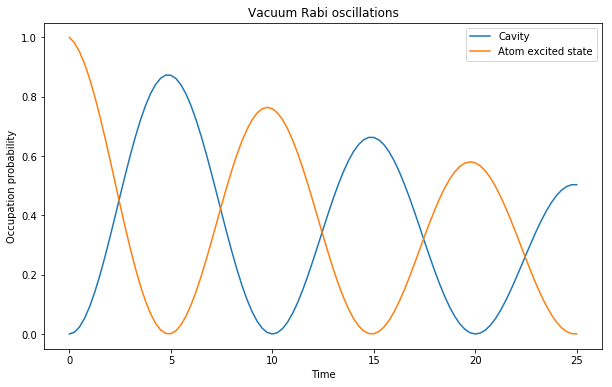

In [16]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')